In [9]:
from collections import OrderedDict
from bs4 import BeautifulSoup
from IPython.display import Image
from itertools import cycle
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords # Import the stop word list
from scipy import interp
from sklearn import cross_validation, datasets, linear_model, metrics, svm, datasets, tree
from sklearn.cluster import MeanShift
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from statistics import mode, mean, median
#import graphviz as gv
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
#import pydotplus
import re

import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('SP500_CFund.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-02,16.660000,17.090000,16.660000,17.090000,17.090000,9040000
1,1950-01-09,17.080000,17.090000,16.650000,16.650000,16.650000,14790000
2,1950-01-16,16.719999,16.940001,16.719999,16.940001,16.940001,7980000
3,1950-01-23,16.920000,16.920000,16.730000,16.900000,16.900000,7430000
4,1950-01-30,17.020000,17.350000,17.020000,17.350000,17.350000,10120000
5,1950-02-06,17.320000,17.320000,17.209999,17.209999,17.209999,8750000
6,1950-02-13,17.059999,17.230000,16.990000,17.230000,17.230000,8850000
7,1950-02-20,17.200001,17.280001,17.170000,17.260000,17.260000,6320000
8,1950-02-27,17.280001,17.330000,17.219999,17.330000,17.330000,7930000
9,1950-03-06,17.320000,17.320000,17.070000,17.139999,17.139999,7540000


In [3]:
df = pd.read_csv('SP500_CFund_monthly.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-01,16.660000,17.090000,16.650000,17.049999,17.049999,42570000
1,1950-02-01,17.049999,17.350000,16.990000,17.219999,17.219999,33430000
2,1950-03-01,17.240000,17.610001,17.070000,17.290001,17.290001,40410000
3,1950-04-01,17.340000,18.070000,17.340000,18.070000,18.070000,48250000
4,1950-05-01,18.219999,18.780001,18.110001,18.780001,18.780001,45080000
5,1950-06-01,18.770000,19.400000,17.440001,17.690001,17.690001,45660000
6,1950-07-01,17.639999,17.910000,16.680000,17.840000,17.840000,44570000
7,1950-08-01,18.020000,18.820000,17.950001,18.420000,18.420000,38900000
8,1950-09-01,18.549999,19.450001,18.540001,19.450001,19.450001,38590000
9,1950-10-01,19.690001,20.160000,19.530001,19.530001,19.530001,48360000


In [4]:
test = df.groupby(['Date'])
dups = test.size().reset_index()
dups[dups[0] > 1]

,Date,0


In [10]:
sp500 = df[['Date','Close','Volume']].copy()
sp500['Month_Close_Change'] = (sp500['Close'] - sp500['Close'].shift(1)) / sp500['Close'].shift(1)
sp500['Month_Volume_Change'] = (sp500['Volume'] - sp500['Volume'].shift(1)) / sp500['Volume'].shift(1)
for i in range(1,13):
    new_close = "Month_Bak%d_Close" % i
    new_volume = "Month_Bak%d_Volume" % i
    close_change = "Month_Bak%d_Close_Change" % i
    volume_change = "Month_Bak%d_Volume_Change" % i
    sp500[new_close] = sp500['Close'].shift(i)
    sp500[new_volume] = sp500['Volume'].shift(i)
    sp500[close_change] = (sp500['Close'].shift(i) - sp500['Close'].shift(i+1)) / sp500['Close'].shift(i+1)
    sp500[volume_change] = (sp500['Volume'].shift(i) - sp500['Volume'].shift(i+1)) / sp500['Volume'].shift(i+1)
sp500.replace([np.inf, -np.inf], np.nan,inplace=True)
sp500.dropna(inplace=True)
sp500

,Date,Close,Volume,Month_Close_Change,Month_Volume_Change,Month_Bak1_Close,Month_Bak1_Volume,Month_Bak1_Close_Change,Month_Bak1_Volume_Change,Month_Bak2_Close,...,Month_Bak10_Close_Change,Month_Bak10_Volume_Change,Month_Bak11_Close,Month_Bak11_Volume,Month_Bak11_Close_Change,Month_Bak11_Volume_Change,Month_Bak12_Close,Month_Bak12_Volume,Month_Bak12_Close_Change,Month_Bak12_Volume_Change
13,1951-02-01,21.799999,41210000,0.006463,-0.412796,21.660000,7.018000e+07,0.061244,0.153707,20.410000,...,0.045113,0.194011,17.290001,4.041000e+07,0.004065,0.208794,17.219999,3.343000e+07,0.009971,-0.214705
14,1951-03-01,21.400000,35530000,-0.018349,-0.137831,21.799999,4.121000e+07,0.006463,-0.412796,21.660000,...,0.039292,-0.065699,18.070000,4.825000e+07,0.045113,0.194011,17.290001,4.041000e+07,0.004065,0.208794
15,1951-04-01,22.430000,37790000,0.048131,0.063608,21.400000,3.553000e+07,-0.018349,-0.137831,21.799999,...,-0.058040,0.012866,18.780001,4.508000e+07,0.039292,-0.065699,18.070000,4.825000e+07,0.045113,0.194011
16,1951-05-01,21.520000,38440000,-0.040571,0.017200,22.430000,3.779000e+07,0.048131,0.063608,21.400000,...,0.008479,-0.023872,17.690001,4.566000e+07,-0.058040,0.012866,18.780001,4.508000e+07,0.039292,-0.065699
17,1951-06-01,20.959999,36220000,-0.026022,-0.057752,21.520000,3.844000e+07,-0.040571,0.017200,22.430000,...,0.032511,-0.127216,17.840000,4.457000e+07,0.008479,-0.023872,17.690001,4.566000e+07,-0.058040,0.012866
18,1951-07-01,22.400000,27990000,0.068702,-0.227223,20.959999,3.622000e+07,-0.026022,-0.057752,21.520000,...,0.055918,-0.007969,18.420000,3.890000e+07,0.032511,-0.127216,17.840000,4.457000e+07,0.008479,-0.023872
19,1951-08-01,23.280001,33630000,0.039286,0.201501,22.400000,2.799000e+07,0.068702,-0.227223,20.959999,...,0.004113,0.253174,19.450001,3.859000e+07,0.055918,-0.007969,18.420000,3.890000e+07,0.032511,-0.127216
20,1951-09-01,23.260000,36420000,-0.000859,0.082962,23.280001,3.363000e+07,0.039286,0.201501,22.400000,...,-0.001024,-0.107113,19.530001,4.836000e+07,0.004113,0.253174,19.450001,3.859000e+07,0.055918,-0.007969
21,1951-10-01,22.940001,42930000,-0.013757,0.178748,23.260000,3.642000e+07,-0.000859,0.082962,23.280001,...,0.046130,0.408754,19.510000,4.318000e+07,-0.001024,-0.107113,19.530001,4.836000e+07,0.004113,0.253174
22,1951-11-01,22.879999,29280000,-0.002616,-0.317959,22.940001,4.293000e+07,-0.013757,0.178748,23.260000,...,0.061244,0.153707,20.410000,6.083000e+07,0.046130,0.408754,19.510000,4.318000e+07,-0.001024,-0.107113


In [11]:
print(list(sp500))

['Date', 'Close', 'Volume', 'Month_Close_Change', 'Month_Volume_Change', 'Month_Bak1_Close', 'Month_Bak1_Volume', 'Month_Bak1_Close_Change', 'Month_Bak1_Volume_Change', 'Month_Bak2_Close', 'Month_Bak2_Volume', 'Month_Bak2_Close_Change', 'Month_Bak2_Volume_Change', 'Month_Bak3_Close', 'Month_Bak3_Volume', 'Month_Bak3_Close_Change', 'Month_Bak3_Volume_Change', 'Month_Bak4_Close', 'Month_Bak4_Volume', 'Month_Bak4_Close_Change', 'Month_Bak4_Volume_Change', 'Month_Bak5_Close', 'Month_Bak5_Volume', 'Month_Bak5_Close_Change', 'Month_Bak5_Volume_Change', 'Month_Bak6_Close', 'Month_Bak6_Volume', 'Month_Bak6_Close_Change', 'Month_Bak6_Volume_Change', 'Month_Bak7_Close', 'Month_Bak7_Volume', 'Month_Bak7_Close_Change', 'Month_Bak7_Volume_Change', 'Month_Bak8_Close', 'Month_Bak8_Volume', 'Month_Bak8_Close_Change', 'Month_Bak8_Volume_Change', 'Month_Bak9_Close', 'Month_Bak9_Volume', 'Month_Bak9_Close_Change', 'Month_Bak9_Volume_Change', 'Month_Bak10_Close', 'Month_Bak10_Volume', 'Month_Bak10_Close_C

In [12]:
# define X and y
#feature_cols = ['Age', 'ACTC', '1stGeneration', 'Convert_GPA_Fix', 'Rank', 'Size', 'Percentile', 'Pell', 'Gender_F', 'Ethnicity_American Indian/Alaskan Native', 'Ethnicity_Asian/Pacific Islander', 'Ethnicity_Black', 'Ethnicity_Hispanic', 'Ethnicity_International', 'Ethnicity_Multiracial', 'Ethnicity_Native Hawaiian/Oth Pac Island', 'Ethnicity_Not Applicable', 'Ethnicity_White', 'Region Description_Chicago Central', 'Region Description_Chicago Far North', 'Region Description_Chicago Far South', 'Region Description_Chicago North', 'Region Description_Chicago South', 'Region Description_International', 'Region Description_Northwest Indiana', 'Region Description_Other Illinois', 'Region Description_Out of State', 'Region Description_Suburban North', 'Region Description_Suburban Northwest', 'Region Description_Suburban South', 'Region Description_Suburban Southwest', 'Region Description_Suburban West', 'Region Description_Unknown', 'College_Commerce', 'College_Communication', 'College_Computer Science', 'College_Education', 'College_Liberal Arts & Social Sciences', 'College_Music', 'College_Science and Health', 'College_Theatre', 'Major_Accountancy', 'Major_Acting', 'Major_Allied Health Technologies', 'Major_Animation', 'Major_Anthropology', 'Major_Arabic Studies', 'Major_Art & Art History', 'Major_BA-Chinese Studies', 'Major_BFA in Graphic Design', 'Major_Biological Sciences', 'Major_Business Administration', 'Major_Chemistry', 'Major_Communication Studies', 'Major_Communication and Media', 'Major_Comp Graphics & Motion Tech', 'Major_Computer Game Development', 'Major_Computer Science', 'Major_Costume Technology', 'Major_Digital Cinema', 'Major_Dramaturgy Criticism', 'Major_E-Business', 'Major_Economics', 'Major_Elementary Education', 'Major_English', 'Major_English Language Instensive', 'Major_Environmental Science', 'Major_Environmental Studies', 'Major_Finance', 'Major_French', 'Major_Geography', 'Major_German', 'Major_Health Sciences', 'Major_History', 'Major_History of Art&Architecture', 'Major_Hospitality Leadership', 'Major_Info Assurnce Securty Engineer', 'Major_Information Systems', 'Major_Information Technology', 'Major_InterActive Media', 'Major_Intercultural Communication', 'Major_International Studies', 'Major_Italian', 'Major_Japanese Studies', 'Major_Jazz Studies', 'Major_Journalism', 'Major_Latin American & Latino Std', 'Major_Lighting Design', 'Major_Major in Writing Rhetoric Disc', 'Major_Management', 'Major_Management Info Sys', 'Major_Marketing', 'Major_Math/Computer Studies', 'Major_Mathematics', 'Major_Media and Cinema Studies', 'Major_Music Composition', 'Major_Music Education', 'Major_Music Performance', 'Major_Network Technologies', 'Major_Peace Justice Conflict St', 'Major_Performing Arts Mgmt', 'Major_Philosophy', 'Major_Physics', 'Major_Playwriting', 'Major_Political Science', 'Major_Pre-Early Childhood Education', 'Major_Pre-Physical Education', 'Major_Pre-Secondary Ed Visual Art', 'Major_Pre-Secondary Education Biolog', 'Major_Pre-Secondary Education Chemis', 'Major_Pre-Secondary Education Englis', 'Major_Pre-Secondary Education Histor', 'Major_Pre-Secondary Education Math', 'Major_Pre-Secondary Education Physic', 'Major_Pre-Secondary Education: Social Sciences', 'Major_Pre-World Lang Edu Japanese', 'Major_Pre-World Lang Educ French', 'Major_Pre-World Lang Educ German', 'Major_Pre-World Lang Educ Spanish', 'Major_Psychology', 'Major_Public Policy', 'Major_Public Relations/Advertisin', 'Major_Real Estate', 'Major_Religious Studies', 'Major_Scene Design', 'Major_Sociology', 'Major_Sound Design', 'Major_Sound Recording Techn', 'Major_Spanish', 'Major_Stage Management', 'Major_Theatre Arts', 'Major_Theatre Management', 'Major_Theatre Technology', 'Major_UGRD Undeclared Business', 'Major_UGRD Undeclared CDM', 'Major_UGRD Undeclared CSH', 'Major_UGRD Undeclared Communication', 'Major_UGRD Undeclared Education', 'Major_UGRD Undeclared TBD', 'Major_Womens and Gender Studies', 'Major_World Lang. Educ. Spanish', 'FIN_AID_INTEREST_Y']
#X_disp = hie_encode[['Age', 'ACTC', '1stGeneration', 'Convert_GPA_Fix', 'Rank', 'Size', 'Percentile', 'Pell', 'Gender_F', 'Ethnicity_American Indian/Alaskan Native', 'Ethnicity_Asian/Pacific Islander', 'Ethnicity_Black', 'Ethnicity_Hispanic', 'Ethnicity_International', 'Ethnicity_Multiracial', 'Ethnicity_Native Hawaiian/Oth Pac Island', 'Ethnicity_Not Applicable', 'Ethnicity_White', 'Region Description_Chicago Central', 'Region Description_Chicago Far North', 'Region Description_Chicago Far South', 'Region Description_Chicago North', 'Region Description_Chicago South', 'Region Description_International', 'Region Description_Northwest Indiana', 'Region Description_Other Illinois', 'Region Description_Out of State', 'Region Description_Suburban North', 'Region Description_Suburban Northwest', 'Region Description_Suburban South', 'Region Description_Suburban Southwest', 'Region Description_Suburban West', 'Region Description_Unknown', 'College_Commerce', 'College_Communication', 'College_Computer Science', 'College_Education', 'College_Liberal Arts & Social Sciences', 'College_Music', 'College_Science and Health', 'College_Theatre', 'Major_Accountancy', 'Major_Acting', 'Major_Allied Health Technologies', 'Major_Animation', 'Major_Anthropology', 'Major_Arabic Studies', 'Major_Art & Art History', 'Major_BA-Chinese Studies', 'Major_BFA in Graphic Design', 'Major_Biological Sciences', 'Major_Business Administration', 'Major_Chemistry', 'Major_Communication Studies', 'Major_Communication and Media', 'Major_Comp Graphics & Motion Tech', 'Major_Computer Game Development', 'Major_Computer Science', 'Major_Costume Technology', 'Major_Digital Cinema', 'Major_Dramaturgy Criticism', 'Major_E-Business', 'Major_Economics', 'Major_Elementary Education', 'Major_English', 'Major_English Language Instensive', 'Major_Environmental Science', 'Major_Environmental Studies', 'Major_Finance', 'Major_French', 'Major_Geography', 'Major_German', 'Major_Health Sciences', 'Major_History', 'Major_History of Art&Architecture', 'Major_Hospitality Leadership', 'Major_Info Assurnce Securty Engineer', 'Major_Information Systems', 'Major_Information Technology', 'Major_InterActive Media', 'Major_Intercultural Communication', 'Major_International Studies', 'Major_Italian', 'Major_Japanese Studies', 'Major_Jazz Studies', 'Major_Journalism', 'Major_Latin American & Latino Std', 'Major_Lighting Design', 'Major_Major in Writing Rhetoric Disc', 'Major_Management', 'Major_Management Info Sys', 'Major_Marketing', 'Major_Math/Computer Studies', 'Major_Mathematics', 'Major_Media and Cinema Studies', 'Major_Music Composition', 'Major_Music Education', 'Major_Music Performance', 'Major_Network Technologies', 'Major_Peace Justice Conflict St', 'Major_Performing Arts Mgmt', 'Major_Philosophy', 'Major_Physics', 'Major_Playwriting', 'Major_Political Science', 'Major_Pre-Early Childhood Education', 'Major_Pre-Physical Education', 'Major_Pre-Secondary Ed Visual Art', 'Major_Pre-Secondary Education Biolog', 'Major_Pre-Secondary Education Chemis', 'Major_Pre-Secondary Education Englis', 'Major_Pre-Secondary Education Histor', 'Major_Pre-Secondary Education Math', 'Major_Pre-Secondary Education Physic', 'Major_Pre-Secondary Education: Social Sciences', 'Major_Pre-World Lang Edu Japanese', 'Major_Pre-World Lang Educ French', 'Major_Pre-World Lang Educ German', 'Major_Pre-World Lang Educ Spanish', 'Major_Psychology', 'Major_Public Policy', 'Major_Public Relations/Advertisin', 'Major_Real Estate', 'Major_Religious Studies', 'Major_Scene Design', 'Major_Sociology', 'Major_Sound Design', 'Major_Sound Recording Techn', 'Major_Spanish', 'Major_Stage Management', 'Major_Theatre Arts', 'Major_Theatre Management', 'Major_Theatre Technology', 'Major_UGRD Undeclared Business', 'Major_UGRD Undeclared CDM', 'Major_UGRD Undeclared CSH', 'Major_UGRD Undeclared Communication', 'Major_UGRD Undeclared Education', 'Major_UGRD Undeclared TBD', 'Major_Womens and Gender Studies', 'Major_World Lang. Educ. Spanish', 'FIN_AID_INTEREST_Y']]

feature_cols = ['Month_Bak1_Close_Change', 'Month_Bak1_Volume_Change', 'Month_Bak2_Close_Change', 'Month_Bak2_Volume_Change', 'Month_Bak3_Close_Change', 'Month_Bak3_Volume_Change', 'Month_Bak4_Close_Change', 'Month_Bak4_Volume_Change', 'Month_Bak5_Close_Change', 'Month_Bak5_Volume_Change', 'Month_Bak6_Close_Change', 'Month_Bak6_Volume_Change', 'Month_Bak7_Close_Change', 'Month_Bak7_Volume_Change', 'Month_Bak8_Close_Change', 'Month_Bak8_Volume_Change', 'Month_Bak9_Close_Change', 'Month_Bak9_Volume_Change', 'Month_Bak10_Close_Change', 'Month_Bak10_Volume_Change', 'Month_Bak11_Close_Change', 'Month_Bak11_Volume_Change', 'Month_Bak12_Close_Change', 'Month_Bak12_Volume_Change']
#X_disp = hie_encode[['Convert_GPA_Fix', 'ACTC', 'Size', 'Rank', 'Percentile', 'Age', 'FIN_AID_INTEREST_Y', '1stGeneration', 'Pell', 'Ethnicity_White', 'Gender_F', 'Region Description_Out of State', 'Ethnicity_Hispanic', 'Region Description_Suburban West', 'College_Science and Health', 'College_Liberal Arts & Social Sciences', 'Major_UGRD Undeclared TBD', 'Region Description_Suburban Southwest', 'Ethnicity_Asian/Pacific Islander', 'College_Commerce', 'College_Computer Science', 'Major_Accountancy', 'Ethnicity_Not Applicable', 'Region Description_Suburban North', 'Region Description_Chicago North', 'Ethnicity_Black', 'Region Description_Suburban Northwest', 'Region Description_Suburban South', 'Ethnicity_Multiracial']]
#hie_df_en = hie_encode[['Enroll', 'Convert_GPA_Fix', 'ACTC', 'Size', 'Rank', 'Percentile', 'Age', 'FIN_AID_INTEREST_Y', '1stGeneration', 'Pell', 'Ethnicity_White', 'Gender_F', 'Region Description_Out of State', 'Ethnicity_Hispanic', 'Region Description_Suburban West', 'College_Science and Health', 'College_Liberal Arts & Social Sciences', 'Major_UGRD Undeclared TBD', 'Region Description_Suburban Southwest', 'Ethnicity_Asian/Pacific Islander', 'College_Commerce', 'College_Computer Science', 'Major_Accountancy', 'Ethnicity_Not Applicable', 'Region Description_Suburban North', 'Region Description_Chicago North', 'Ethnicity_Black', 'Region Description_Suburban Northwest', 'Region Description_Suburban South', 'Ethnicity_Multiracial']]
X = sp500[feature_cols].as_matrix()
y = sp500['Month_Volume_Change'].as_matrix()

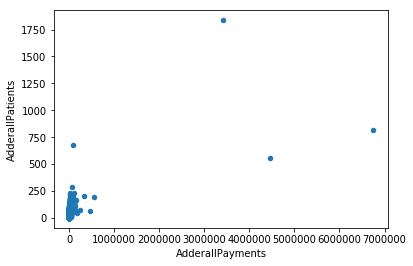

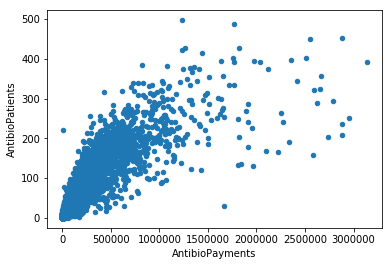

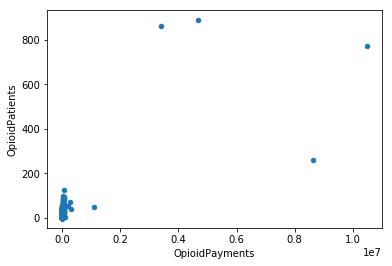

In [11]:
df_sums.plot.scatter(x='AdderallPayments',y='AdderallPatients')
df_sums.plot.scatter(x='AntibioPayments',y='AntibioPatients')
df_sums.plot.scatter(x='OpioidPayments',y='OpioidPatients')